<a href="https://colab.research.google.com/github/sheraphineshovan/Data_Science_Miniprojects/blob/main/td.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency
from sklearn.svm import SVC

dataset

In [ ]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


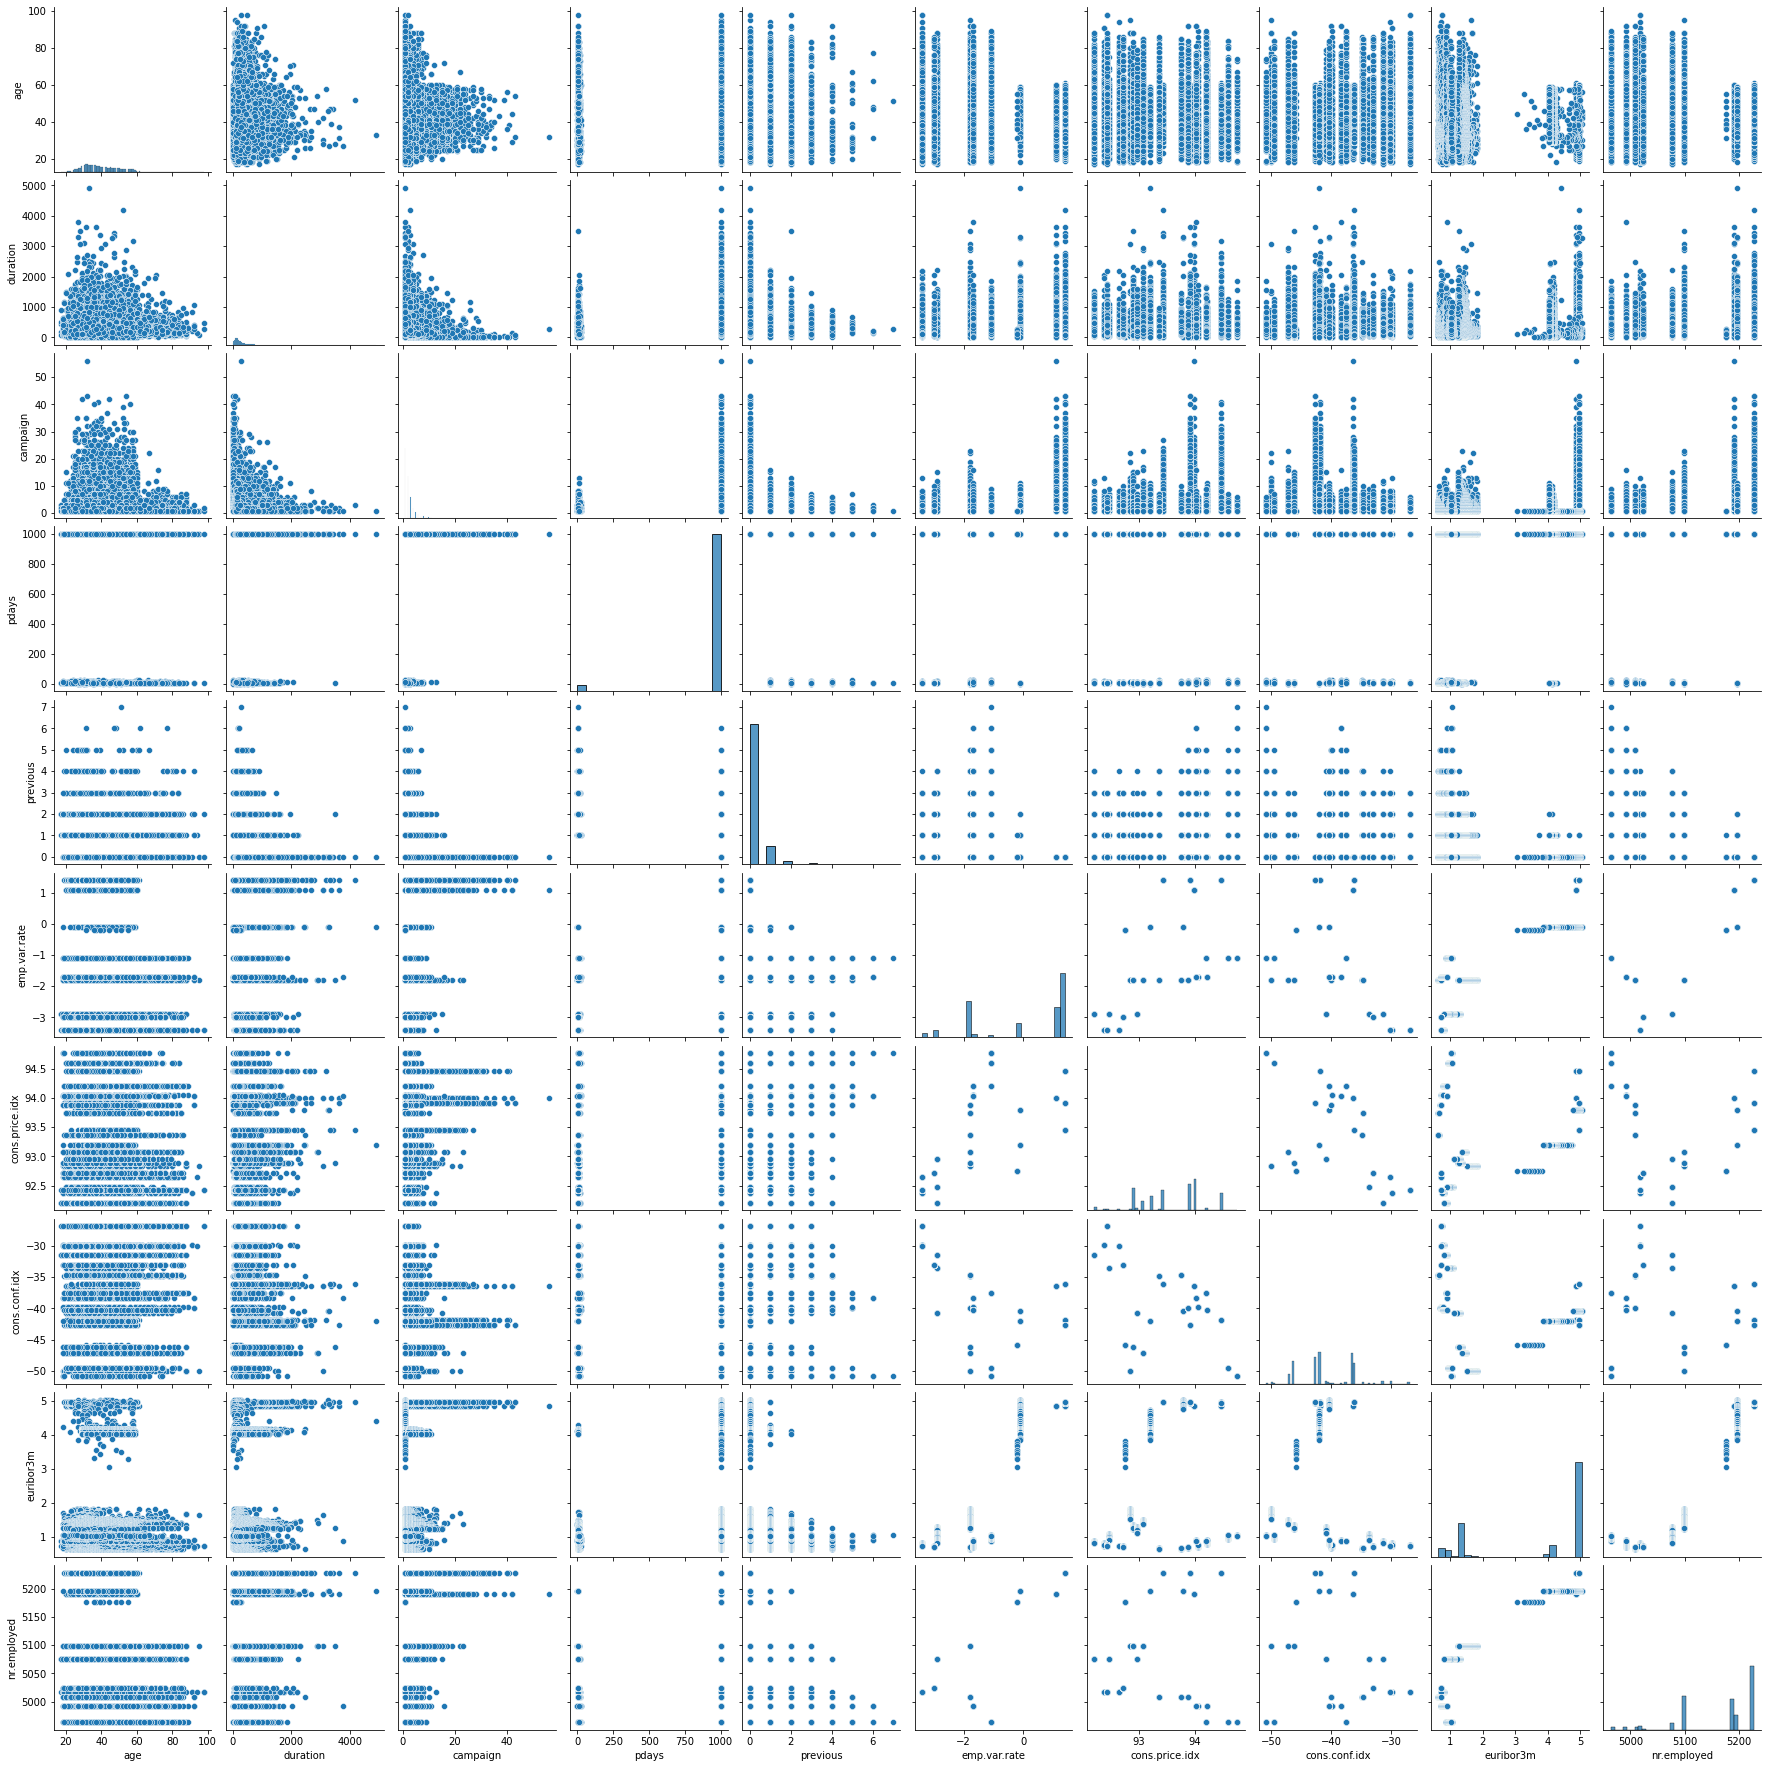

In [ ]:
sns.pairplot(df)

<Axes: >

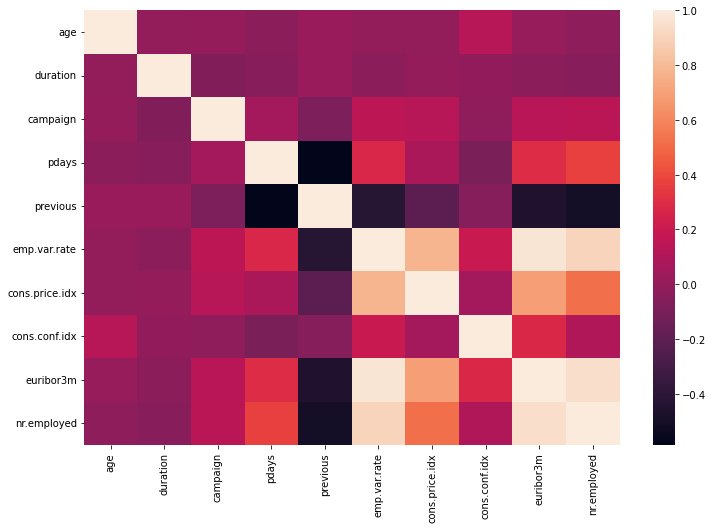

In [ ]:
plt.figure(figsize = [12,8])
sns.heatmap(df.corr())

In [ ]:
def chi_sq(v1, v2):
    table = pd.crosstab(v1, v2)
    a,b,c,d = chi2_contingency(table)
    if b <= 0.05:
        print('accept aleternate hypothesis', round(b, 2))
    else:
        print("failed to reject null hypothesis", round(b, 2))
    return table

In [ ]:
chi_sq(df['job'], df['marital'])

accept aleternate hypothesis 0.0


marital,divorced,married,single,unknown
job,,,,
admin.,1280,5253,3875,14
blue-collar,728,6687,1825,14
entrepreneur,179,1071,203,3
housemaid,161,777,119,3
management,331,2089,501,3
retired,348,1274,93,5
self-employed,133,904,379,5
services,532,2294,1137,6
student,9,41,824,1


In [ ]:
chi_sq(df['loan'], df['housing'])

accept aleternate hypothesis 0.0


housing,no,unknown,yes
loan,,,
no,16065,0,17885
unknown,0,990,0
yes,2557,0,3691


In [ ]:
chi_sq(df['default'], df['loan'])

failed to reject null hypothesis 0.38


loan,no,unknown,yes
default,,,
no,26849,763,4976
unknown,7098,227,1272
yes,3,0,0


encode the variables

In [ ]:
x = df.iloc[:, :-1]
y = df['y']

In [ ]:
df=x.select_dtypes(object).columns
df_enc=pd.get_dummies(x,columns=df)

In [ ]:
le = LabelEncoder()
le_enc = le.fit_transform(y)

In [ ]:
le_enc

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_enc, le_enc, test_size = 0.2, random_state =123)

In [ ]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(8238, 63)
(32950, 63)
(8238,)
(32950,)


In [ ]:
def acc_report(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    cm_matrix = confusion_matrix(actual, predicted)
    class_report = classification_report(actual, predicted)
    print(acc_score)
    print(cm_matrix)
    print(class_report)


In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predlrtrain = lr.predict(x_train)
predlrtest = lr.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
acc_report(predlrtrain, y_train)

0.9093171471927163
[[28497  2235]
 [  753  1465]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     30732
           1       0.40      0.66      0.50      2218

    accuracy                           0.91     32950
   macro avg       0.69      0.79      0.72     32950
weighted avg       0.94      0.91      0.92     32950



In [ ]:
acc_report(predlrtest, y_test)

0.9127215343529983
[[7124  545]
 [ 174  395]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7669
           1       0.42      0.69      0.52       569

    accuracy                           0.91      8238
   macro avg       0.70      0.81      0.74      8238
weighted avg       0.94      0.91      0.92      8238



In [ ]:
dtree = DecisionTreeClassifier(max_depth=3, min_samples_split=5)
dtree.fit(x_train, y_train)
preditreetrain = dtree.predict(x_train)
preditreetest = dtree.predict(x_test)

In [ ]:
acc_report(preditreetrain, y_train)


0.9085887708649469
[[27774  1536]
 [ 1476  2164]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     29310
           1       0.58      0.59      0.59      3640

    accuracy                           0.91     32950
   macro avg       0.77      0.77      0.77     32950
weighted avg       0.91      0.91      0.91     32950



In [ ]:
acc_report(preditreetest, y_test)

0.9083515416363195
[[6908  365]
 [ 390  575]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7273
           1       0.61      0.60      0.60       965

    accuracy                           0.91      8238
   macro avg       0.78      0.77      0.78      8238
weighted avg       0.91      0.91      0.91      8238



In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrftrain = rf.predict(x_train)
predrftest = rf.predict(x_test)


In [ ]:
acc_report(predrftrain, y_train)

0.9999696509863429
[[29250     1]
 [    0  3699]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29251
           1       1.00      1.00      1.00      3699

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



In [ ]:
acc_report(predrftest, y_test)

0.9130857004127215
[[7075  493]
 [ 223  447]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7568
           1       0.48      0.67      0.56       670

    accuracy                           0.91      8238
   macro avg       0.72      0.80      0.75      8238
weighted avg       0.93      0.91      0.92      8238



In [ ]:
gboost = GradientBoostingClassifier(max_depth=3)
gboost.fit(x_train, y_train)
predgboostrain = gboost.predict(x_train)
predgboostest = gboost.predict(x_test)

In [ ]:
acc_report(y_train, predgboostrain)
acc_report(y_test, predgboostest)

0.9226403641881639
[[28350   900]
 [ 1649  2051]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     29250
           1       0.70      0.55      0.62      3700

    accuracy                           0.92     32950
   macro avg       0.82      0.76      0.79     32950
weighted avg       0.92      0.92      0.92     32950

0.9189123573682932
[[7043  255]
 [ 413  527]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7298
           1       0.67      0.56      0.61       940

    accuracy                           0.92      8238
   macro avg       0.81      0.76      0.78      8238
weighted avg       0.91      0.92      0.92      8238



In [ ]:

adboost = AdaBoostClassifier()
adboost.fit(x_train, y_train)
predadboostrain = adboost.predict(x_train)
predadboostest = adboost.predict(x_test)

In [ ]:
acc_report(y_train, predadboostrain)
acc_report(y_test, predadboostest)

0.9094992412746585
[[28460   790]
 [ 2192  1508]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29250
           1       0.66      0.41      0.50      3700

    accuracy                           0.91     32950
   macro avg       0.79      0.69      0.73     32950
weighted avg       0.90      0.91      0.90     32950

0.9104151493080845
[[7115  183]
 [ 555  385]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7298
           1       0.68      0.41      0.51       940

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
knn = KNeighborsClassifier(n_neighbors=35 )
knn.fit(x_train, y_train)
predknntrain = knn.predict(x_train)
predknntest = knn.predict(x_test)

In [ ]:
acc_report(y_train, predknntrain)
acc_report(y_test, predknntest)

0.9155690440060698
[[28300   950]
 [ 1832  1868]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     29250
           1       0.66      0.50      0.57      3700

    accuracy                           0.92     32950
   macro avg       0.80      0.74      0.76     32950
weighted avg       0.91      0.92      0.91     32950

0.911750424860403
[[7034  264]
 [ 463  477]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7298
           1       0.64      0.51      0.57       940

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.90      0.91      0.91      8238



In [ ]:
import xgboost as xgb
dtest_clf = xgb.DMatrix(x_test, y_test)
dtrain_clf = xgb.DMatrix(x_train, y_train)

In [ ]:
xgb_classifier=xgb.XGBClassifier(n_estimators=100,tree_methods='hist')
xgb_classifier.fit(x_train,y_train)
xgb_pred_train=xgb_classifier.predict(x_train)
xgb_pred_test=xgb_classifier.predict(x_test)

[03:18:25] WARNING: ../src/learner.cc:767: 
Parameters: { "tree_methods" } are not used.



In [ ]:
acc_report(y_train, xgb_pred_train)
acc_report(y_test, xgb_pred_test)

0.9606373292867981
[[28839   411]
 [  886  2814]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     29250
           1       0.87      0.76      0.81      3700

    accuracy                           0.96     32950
   macro avg       0.92      0.87      0.90     32950
weighted avg       0.96      0.96      0.96     32950

0.91442097596504
[[7000  298]
 [ 407  533]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7298
           1       0.64      0.57      0.60       940

    accuracy                           0.91      8238
   macro avg       0.79      0.76      0.78      8238
weighted avg       0.91      0.91      0.91      8238



In [ ]:
svc = SVC(kernel = 'poly')
svc.fit(x_train,y_train)
svc_preds_train = svc.predict(x_train)
svc_preds_test = svc.predict(x_test)

In [ ]:
def model_eval(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    cm_matrix = confusion_matrix(actual, predicted)
    class_report = classification_report(actual, predicted)
    print(acc_score)
    print(cm_matrix)
    print(class_report)


In [ ]:
model_eval(y_train,svc_preds_train)

0.8976024279210926
[[28790   460]
 [ 2914   786]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     29250
           1       0.63      0.21      0.32      3700

    accuracy                           0.90     32950
   macro avg       0.77      0.60      0.63     32950
weighted avg       0.88      0.90      0.87     32950



In [ ]:
model_eval(y_test,svs_preds_train)

Balancing the dataset using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()

In [ ]:
x_smote,y_smote = oversample.fit_resample(df_enc,le_enc)

In [ ]:
print(x_smote.shape)
print(y_smote.shape)


(73096, 63)
(73096,)


In [ ]:
from collections import Counter

In [ ]:
counter = Counter(y_smote)
print(counter)

Counter({0: 36548, 1: 36548})


In [ ]:
 x_train_smote,x_test_smote,y_train_smote,y_test_smote = train_test_split(x_smote,y_smote,test_size = 0.2,random_state=123)

(58476, 63)
(14620, 63)
(58476,)
(14620,)


In [ ]:
svc = SVC()
svc.fit(x_train_smote,y_train_smote)
preds_smote_svc_train = svc.predict(x_train_smote)
preds_smotte_svc_test = svc.predict(x_test_smote)

In [ ]:
model_eval(y_train_smote,preds_smote_svc_train )

0.8457828852862713
[[24471  4760]
 [ 4258 24987]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     29231
           1       0.84      0.85      0.85     29245

    accuracy                           0.85     58476
   macro avg       0.85      0.85      0.85     58476
weighted avg       0.85      0.85      0.85     58476



In [ ]:
model_eval(y_test_smote,preds_smotte_svc_test)

0.8497948016415868
[[6163 1154]
 [1042 6261]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7317
           1       0.84      0.86      0.85      7303

    accuracy                           0.85     14620
   macro avg       0.85      0.85      0.85     14620
weighted avg       0.85      0.85      0.85     14620



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb = GaussianNB()
gb.fit(x_train_smote,y_train_smote)


GaussianNB()

In [ ]:
preds_smote_gb_train = gb.predict(x_train_smote)
preds_smotte_gb_test = gb.predict(x_test_smote)

In [ ]:
model_eval(y_train_smote,preds_smote_gb_train)


0.8883473561803132
[[25704  3527]
 [ 3002 26243]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     29231
           1       0.88      0.90      0.89     29245

    accuracy                           0.89     58476
   macro avg       0.89      0.89      0.89     58476
weighted avg       0.89      0.89      0.89     58476



In [ ]:
model_eval(y_test_smote,preds_smotte_gb_test)

0.8900136798905609
[[6460  857]
 [ 751 6552]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7317
           1       0.88      0.90      0.89      7303

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620



In [ ]:
gb.priors

Naive Bayes without SMOTE

In [ ]:
gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
preds_train_gb = gb.predict(x_train)
preds_test_gb = gb.predict(x_test)

In [ ]:
model_eval(y_train,preds_train_gb)

0.8633687405159333
[[26527  2723]
 [ 1779  1921]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     29250
           1       0.41      0.52      0.46      3700

    accuracy                           0.86     32950
   macro avg       0.68      0.71      0.69     32950
weighted avg       0.88      0.86      0.87     32950



In [ ]:
model_eval(y_test,preds_test_gb)

0.8624666181111921
[[6620  678]
 [ 455  485]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7298
           1       0.42      0.52      0.46       940

    accuracy                           0.86      8238
   macro avg       0.68      0.71      0.69      8238
weighted avg       0.88      0.86      0.87      8238

